# Why weights decrease along a sequence?

In [3]:
import pprint
import subprocess
import sys 
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline

np.set_printoptions(suppress=True, precision=2)

sns.set(font_scale=2.0)

#### Git machinery

In [4]:
run_old_version = False
if run_old_version:
    hash_when_file_was_written = 'e9f19589b294dac37bf4c81e429f05652544ed82'
    hash_at_the_moment = subprocess.check_output(["git", 'rev-parse', 'HEAD']).strip()
    print('Actual hash', hash_at_the_moment)
    
    print('Hash of the commit used to run the simulation', hash_when_file_was_written)
    subprocess.call(['git', 'checkout', hash_when_file_was_written])

#### Load libraries

In [5]:
from network import Protocol, BCPNNFast, NetworkManager
from plotting_functions import plot_state_variables_vs_time

## Weights do decay
Here I show how the inter-sequence weights decay for the later members of the sequence for different epochs

In [6]:
# Patterns parameters
hypercolumns = 4
minicolumns = 30
number_of_patterns = 10

# Manager properties
dt = 0.001
T_recalling = 5.0
values_to_save = ['o']

# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 5

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(number_of_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epochs_history = manager.run_network_protocol(protocol=protocol, verbose=True, values_to_save_epoch=['w'])

('epochs', 0)
('epochs', 1)
('epochs', 2)
('epochs', 3)
('epochs', 4)


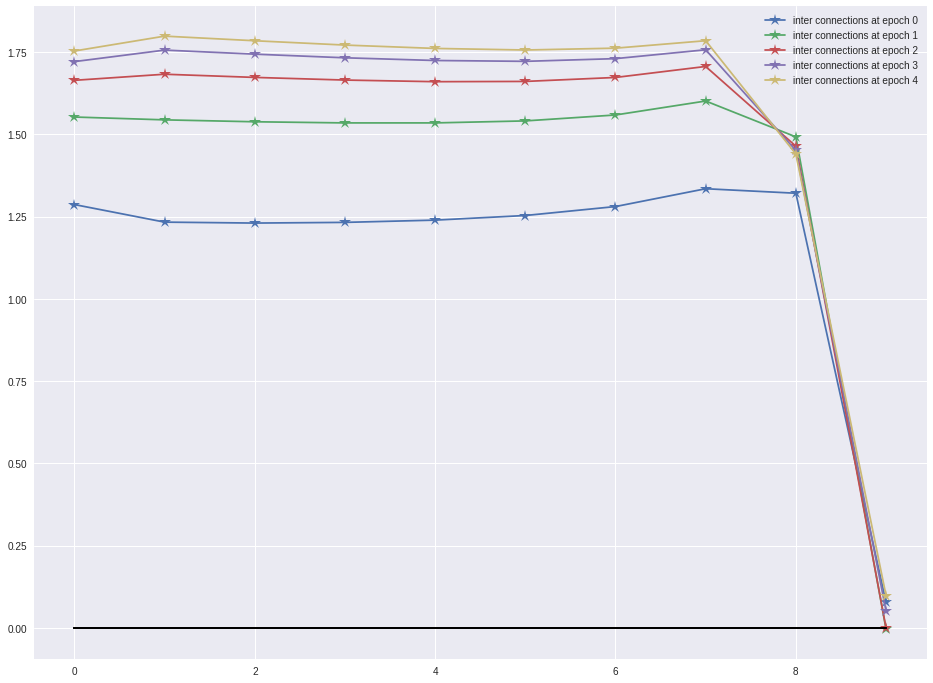

In [7]:
long_list = []
diagonals = []

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
for w in epochs_history['w']:
    inter_connections = []
    diagonal = []

    for i in range(number_of_patterns):
        diagonal.append(w[i, i])
        value = w[i + 1, i]
        inter_connections.append(value)

    long_list.append(inter_connections)
    diagonals.append(diagonal)

for i in range(epochs):
    ax.plot(long_list[i], '*-', markersize=13, label='inter connections at epoch ' + str(i))
    ax.plot(diagonals[i], 'k')

ax.legend();

Something important to note is that when the chain is shorter the phenomenon is not present. The chain needs to be longer in order for the phenomena to happen. We do now the case for longer chains:

#### Longer chains that cover the whole network

In [16]:
# Patterns parameters
hypercolumns = 4
minicolumns = 30
number_of_patterns = 30

# Manager properties
dt = 0.001
T_recalling = 5.0
values_to_save = ['o']

# Protocol
training_time = 0.1
inter_sequence_interval = 5.0
inter_pulse_interval = 0.0
epochs = 5

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(number_of_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epochs_history = manager.run_network_protocol(protocol=protocol, verbose=True, values_to_save_epoch=['w'])

('epochs', 0)
('epochs', 1)
('epochs', 2)
('epochs', 3)
('epochs', 4)


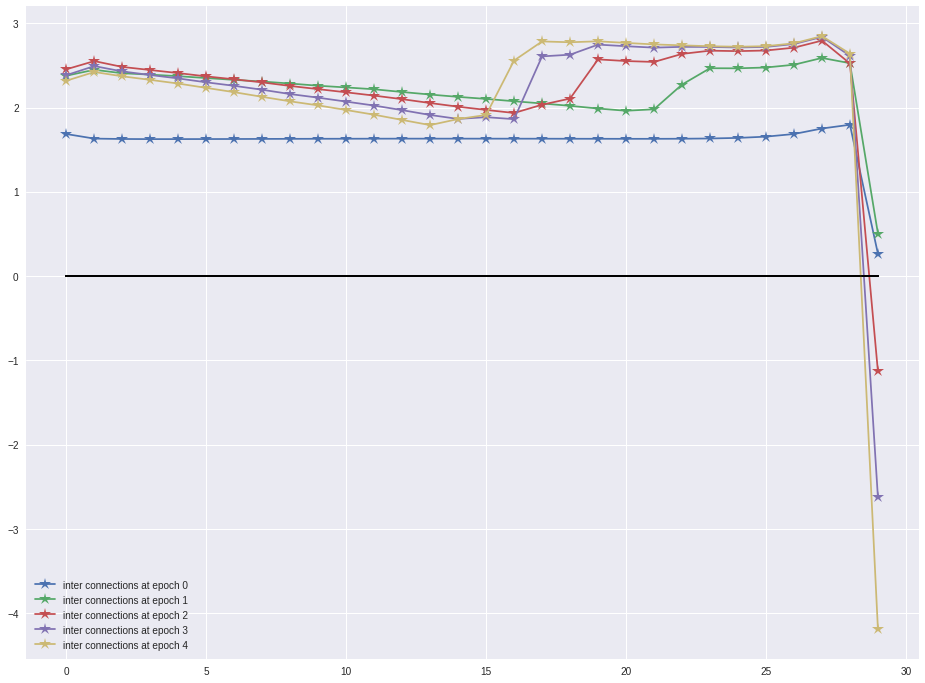

In [17]:
long_list = []
diagonals = []

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
for w in epochs_history['w']:
    inter_connections = []
    diagonal = []

    for i in range(number_of_patterns):
        diagonal.append(w[i, i])
        value = w[i + 1, i]
        inter_connections.append(value)

    long_list.append(inter_connections)
    diagonals.append(diagonal)

for i in range(epochs):
    ax.plot(long_list[i], '*-', markersize=13, label='inter connections at epoch ' + str(i))
    ax.plot(diagonals[i], 'k')

ax.legend();

This is a very interesting example. The first epoch is quite uniform but the following epochs suffer from depression in the first sets of weights, the depth of this depression goes further the bigger is the inter sequence interval.

#### Longer chain that does not cover the whole network

In [20]:
# Patterns parameters
hypercolumns = 4
minicolumns = 60
number_of_patterns = 30

# Manager properties
dt = 0.001
T_recalling = 5.0
values_to_save = ['o']

# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 5

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns)

# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(number_of_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
epochs_history = manager.run_network_protocol(protocol=protocol, verbose=True, values_to_save_epoch=['w'])

('epochs', 0)
('epochs', 1)
('epochs', 2)
('epochs', 3)
('epochs', 4)


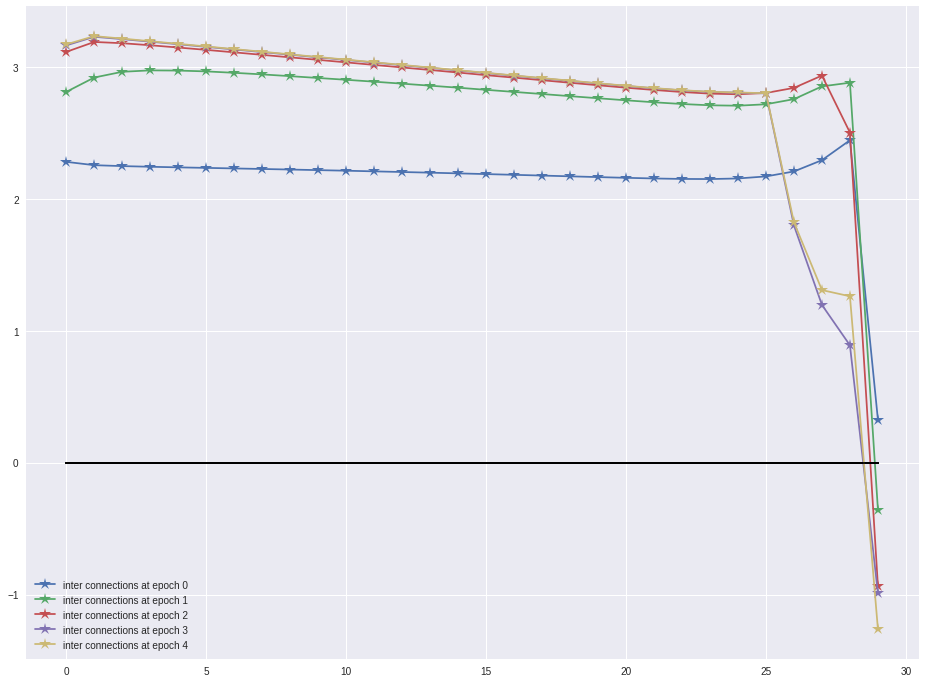

In [21]:
long_list = []
diagonals = []

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
for w in epochs_history['w']:
    inter_connections = []
    diagonal = []

    for i in range(number_of_patterns):
        diagonal.append(w[i, i])
        value = w[i + 1, i]
        inter_connections.append(value)

    long_list.append(inter_connections)
    diagonals.append(diagonal)

for i in range(epochs):
    ax.plot(long_list[i], '*-', markersize=13, label='inter connections at epoch ' + str(i))
    ax.plot(diagonals[i], 'k')

ax.legend();

#### Simple example

In [10]:
# Patterns parameters
hypercolumns = 4
minicolumns = 10
n_patterns = 10

# Manager properties
dt = 0.001
T_recalling = 5.0
values_to_save = ['o', 's', 'z_pre', 'z_post', 'p_pre', 'p_post', 'p_co', 'z_co', 'w', 'p']
    
# Protocol
training_time = 0.1
inter_sequence_interval = 1.0
inter_pulse_interval = 0.0
epochs = 3

# Build the network
nn = BCPNNFast(hypercolumns, minicolumns)

nn.k_inner = False


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

# Build the protocol for training
protocol = Protocol()
patterns_indexes = [i for i in range(n_patterns)]
protocol.simple_protocol(patterns_indexes, training_time=training_time, inter_pulse_interval=inter_pulse_interval,
                         inter_sequence_interval=inter_sequence_interval, epochs=epochs)

# Train
manager.run_network_protocol(protocol=protocol, verbose=True)

('epochs', 0)
('epochs', 1)
('epochs', 2)


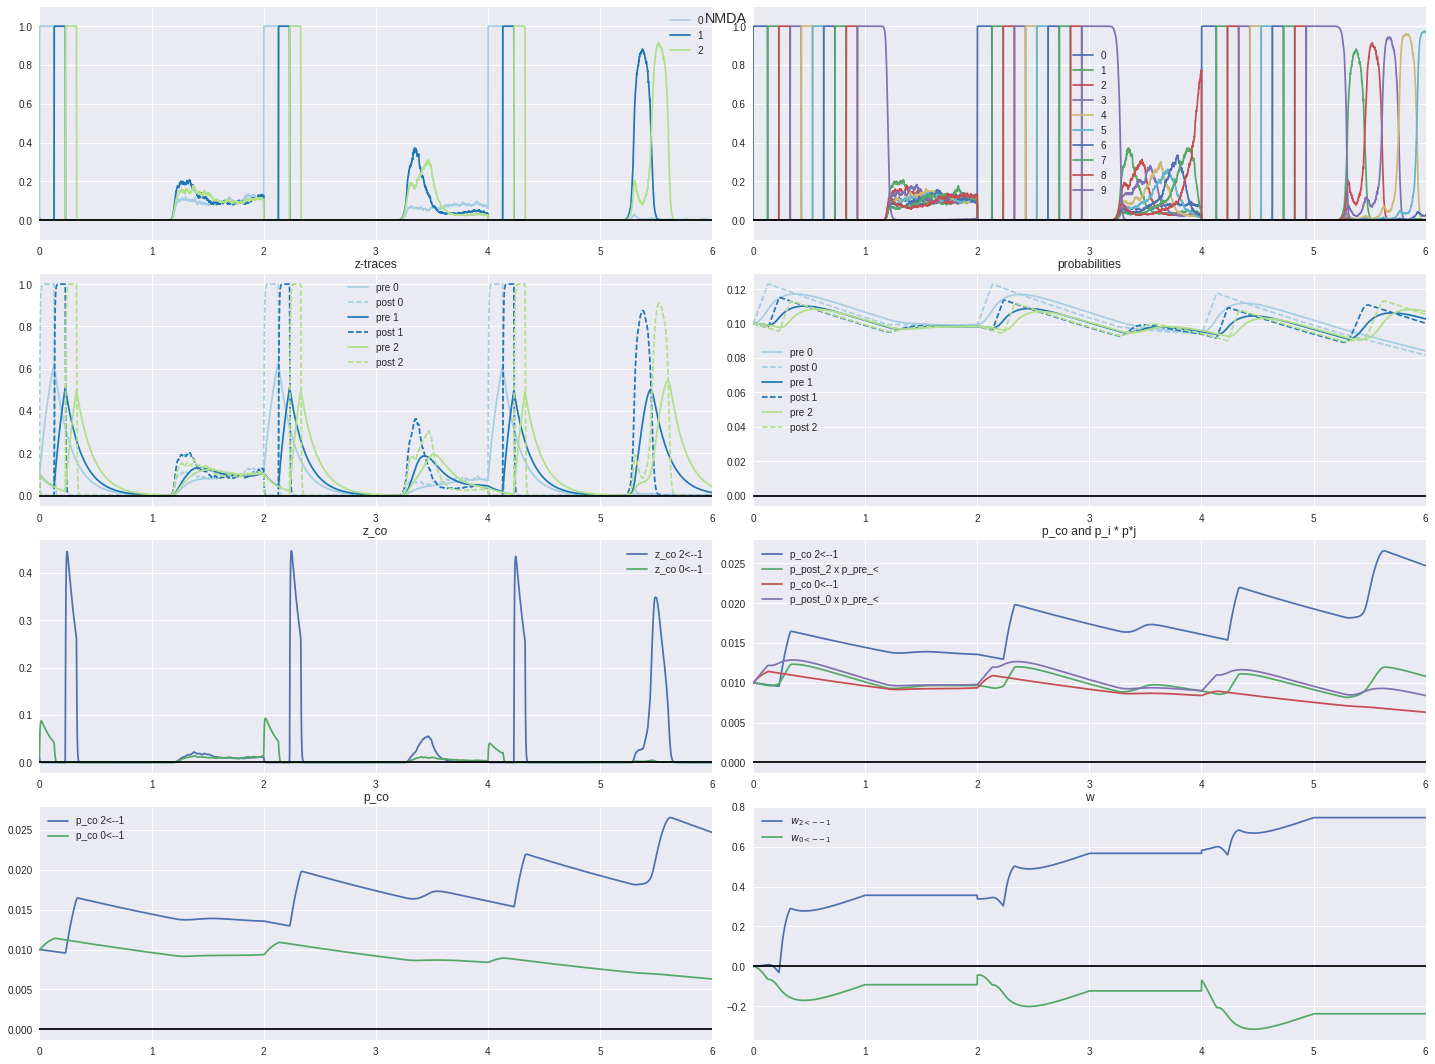

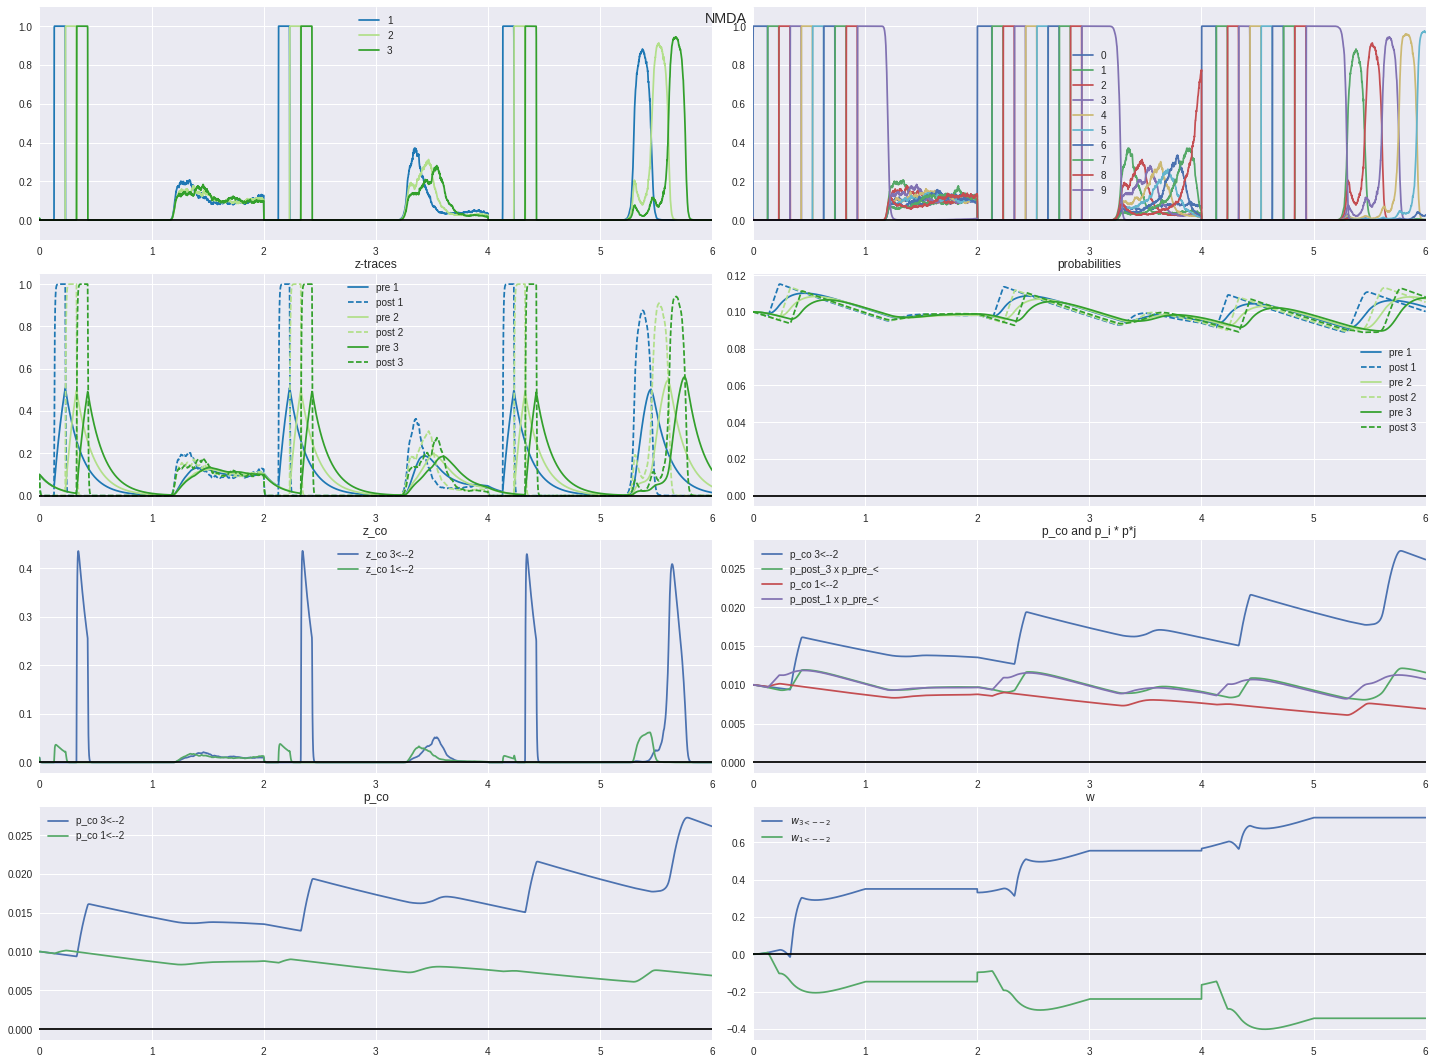